In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd 
import pandas as pd

In [2]:
# See the audio of the dataset
file_name = "Background//CR0-013534_20140702_14300016.wav"


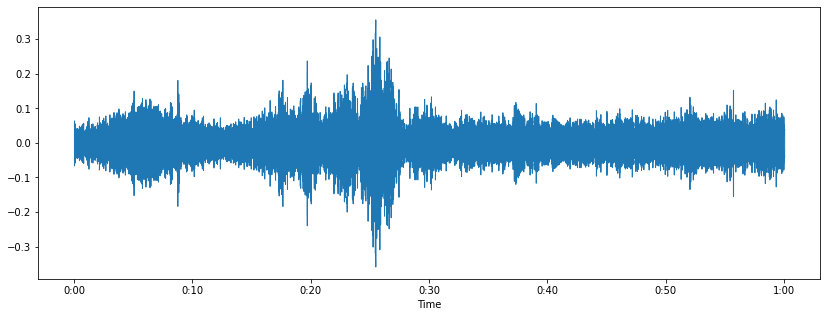

In [3]:
# Bullet sound
plt.figure(figsize=(14,5))
data, sample_rate = librosa.load(file_name)
librosa.display.waveshow(data, sr = sample_rate)
ipd.Audio(file_name)

In [4]:
sample_rate,data

(22050,
 array([-0.00804381, -0.01274721, -0.0129423 , ...,  0.01317039,
         0.01252309,  0.        ], dtype=float32))

In [5]:
df = pd.read_csv("UrbanSound8K/metadata/UrbanSound8K.csv")
df.head(10)

slice_file_name    fsID      start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032   0.000000   0.317551         1     5        3   
1  100263-2-0-117.wav  100263  58.500000  62.500000         1     5        2   
2  100263-2-0-121.wav  100263  60.500000  64.500000         1     5        2   
3  100263-2-0-126.wav  100263  63.000000  67.000000         1     5        2   
4  100263-2-0-137.wav  100263  68.500000  72.500000         1     5        2   
5  100263-2-0-143.wav  100263  71.500000  75.500000         1     5        2   
6  100263-2-0-161.wav  100263  80.500000  84.500000         1     5        2   
7    100263-2-0-3.wav  100263   1.500000   5.500000         1     5        2   
8   100263-2-0-36.wav  100263  18.000000  22.000000         1     5        2   
9    100648-1-0-0.wav  100648   4.823402   5.471927         2    10        1   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing  
5  children_playing  
6  children_playing  
7  children_playing  
8  children_playing  
9          car_horn

# Data Preprocessing 

In [6]:
import numpy as np
import os

In [7]:
# Using MFCC
def extractor(file):
    audio, sample_rate = librosa.load(file, res_type= "kaiser_fast")
    mfccs_transformed = librosa.feature.mfcc(y=audio, sr = sample_rate, n_mfcc=50)
    mfccs_scaled = np.mean(mfccs_transformed.T, axis=0)
    return mfccs_scaled

In [12]:
dataset_path='UrbanSound8K/audio/'

In [13]:
features = []
for index_num,row in df.iterrows():
    file_name = os.path.join(os.path.abspath(dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data= extractor(file_name)
    features.append([data,final_class_labels])

KeyboardInterrupt: 

In [14]:
features = []
path = "sonidosDeFondo/"
for elem in os.listdir(path):
    a = os.path.abspath(elem)
    print(a)

C:\Users\Dell\Documents\noise_recognition\model\data\CR0-013534_20140702_14300016.wav
C:\Users\Dell\Documents\noise_recognition\model\data\CR0-013534_20140703_03000017.wav
C:\Users\Dell\Documents\noise_recognition\model\data\CR0-013534_20140703_09300022.wav
C:\Users\Dell\Documents\noise_recognition\model\data\CR0-013534_20140703_14300025.wav
C:\Users\Dell\Documents\noise_recognition\model\data\CR0-013534_20140703_21000012.wav
C:\Users\Dell\Documents\noise_recognition\model\data\CR0-013534_20140704_00000020.wav
C:\Users\Dell\Documents\noise_recognition\model\data\CR0-013534_20140704_11000004.wav
C:\Users\Dell\Documents\noise_recognition\model\data\CR0-013534_20140704_16300019.wav
C:\Users\Dell\Documents\noise_recognition\model\data\CR0-013534_20140704_22300001.wav
C:\Users\Dell\Documents\noise_recognition\model\data\CR0-013534_20140704_23300012.wav
C:\Users\Dell\Documents\noise_recognition\model\data\CR0-013534_20140705_05300026.wav
C:\Users\Dell\Documents\noise_recognition\model\data\C

In [15]:
path = "sonidosDeFondo/"
for elem in os.listdir(path):
    print(elem)
    path1 = os.path.abspath(elem)
    print(path1)
    mccfs = extractor(path1)
    features.append(mccfs, "Background")

CR0-013534_20140702_14300016.wav
C:\Users\Dell\Documents\noise_recognition\model\data\CR0-013534_20140702_14300016.wav


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Dell\\Documents\\noise_recognition\\model\\data\\CR0-013534_20140702_14300016.wav'

In [22]:
#Creation of the dataset
df = pd.DataFrame(features,columns = ["features","class"])

In [27]:
#Split the dataset
X = np.array(df["features"].tolist())
y = np.array(df["class"].tolist())

In [28]:
y = np.array(pd.get_dummies(y))
y.shape

(9832, 11)

In [29]:
# Train and test split
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Testing traditional  models
- RandomForestClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- KNeighborsClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html?highlight=kneighborsclassifier#sklearn.neighbors.KNeighborsClassifier
- Cross-validation-Score: https://scikit-learn.org/stable/modules/cross_validation.html

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, cross_validate


In [39]:
forest = RandomForestClassifier()
forest.fit(X_train,y_train)

RandomForestClassifier()

In [40]:
y_pred = forest.predict(X_test)

In [41]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       272
           1       0.83      1.00      0.91       212
           2       0.57      0.98      0.72        62
           3       0.36      0.99      0.53        93
           4       0.47      0.92      0.62       122
           5       0.65      0.97      0.78       160
           6       0.87      1.00      0.93       199
           7       0.52      1.00      0.68        47
           8       0.86      0.97      0.92       236
           9       0.74      1.00      0.85       180
          10       0.27      0.96      0.42        73

   micro avg       0.66      0.98      0.79      1656
   macro avg       0.65      0.98      0.76      1656
weighted avg       0.74      0.98      0.83      1656
 samples avg       0.66      0.66      0.66      1656



C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
# cross validation
cross_validate(forest, X_train, y_train, cv=10)

{'fit_time': array([5.31503582, 5.10796475, 5.0080111 , 5.01498294, 5.01501203,
        5.06300044, 5.00191021, 5.01787615, 5.03811312, 4.99496508]),
 'score_time': array([0.06399608, 0.06400037, 0.06198788, 0.06199813, 0.06195211,
        0.06196356, 0.06303453, 0.06100011, 0.06196427, 0.06303573]),
 'test_score': array([0.67615176, 0.68563686, 0.64498645, 0.6504065 , 0.66485753,
        0.66757123, 0.64721845, 0.6458616 , 0.64043419, 0.67164179])}


## KNN Model 
 The model that performs the best is KNeighborsClassifier with a accuracy avarage of 82%

In [60]:
knn = KNeighborsClassifier()

In [61]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [69]:
y_pred = knn.predict(X_test)

In [70]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       272
           1       0.95      0.91      0.93       267
           2       0.62      0.97      0.75        68
           3       0.82      0.74      0.78       282
           4       0.63      0.87      0.73       174
           5       0.84      0.92      0.88       218
           6       0.89      0.94      0.91       219
           7       0.59      0.76      0.67        71
           8       0.94      0.94      0.94       267
           9       0.88      0.91      0.89       232
          10       0.63      0.82      0.72       201

   micro avg       0.83      0.89      0.86      2271
   macro avg       0.80      0.89      0.84      2271
weighted avg       0.84      0.89      0.86      2271
 samples avg       0.83      0.83      0.83      2271



C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
# Cross validation of KNN model
cross_validate(knn, X_train, y_train, cv=10)

{'fit_time': array([0.00399733, 0.00299811, 0.0030005 , 0.00296521, 0.00300002,
        0.00499916, 0.00301242, 0.00299811, 0.00399923, 0.00396323]),
 'score_time': array([0.27399921, 0.26903439, 0.26058817, 0.25800228, 0.25599599,
        0.25102639, 0.27799845, 0.26196361, 0.25203991, 0.25203371]),
 'test_score': array([0.81842818, 0.79403794, 0.80758808, 0.81842818, 0.83039349,
        0.83039349, 0.83175034, 0.82360923, 0.80597015, 0.82089552])}

# Noise Recognition - Tensor Flow 

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [82]:
num_labels=y.shape[1]
num_labels

11

In [171]:
model=Sequential()
###first layer
model.add(Dense(1000,input_shape=(50,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [172]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 1000)              51000     
                                                                 
 activation_50 (Activation)  (None, 1000)              0         
                                                                 
 dropout_38 (Dropout)        (None, 1000)              0         
                                                                 
 dense_52 (Dense)            (None, 1000)              1001000   
                                                                 
 activation_51 (Activation)  (None, 1000)              0         
                                                                 
 dropout_39 (Dropout)        (None, 1000)              0         
                                                                 
 dense_53 (Dense)            (None, 1000)            

In [173]:
model.compile(loss= "CategoricalCrossentropy", metrics= ["accuracy"], optimizer="adam")

In [174]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from datetime import datetime 

In [175]:
checkpoint = ModelCheckpoint("noise.h5", save_best_only=True)
early_stop = EarlyStopping(patience=10, restore_best_weights=True)
callbacks =[
    checkpoint,
    early_stop
]
params = {
    "validation_data": (X_test,y_test),
    "epochs": 100, 
    "verbose": 1,
    "callbacks": callbacks,
    "batch_size":64,
}


In [181]:
%%time 
model.fit(X_train,y_train,**params)

Epoch 1/100
116/116 [==============================] - 2s 16ms/step - loss: 0.2963 - accuracy: 0.9104 - val_loss: 0.2834 - val_accuracy: 0.9166
Epoch 2/100
116/116 [==============================] - 2s 18ms/step - loss: 0.3092 - accuracy: 0.9079 - val_loss: 0.2766 - val_accuracy: 0.9243
Epoch 3/100
116/116 [==============================] - 2s 18ms/step - loss: 0.2909 - accuracy: 0.9138 - val_loss: 0.2761 - val_accuracy: 0.9276
Epoch 4/100
116/116 [==============================] - 2s 18ms/step - loss: 0.3112 - accuracy: 0.9057 - val_loss: 0.3123 - val_accuracy: 0.9174
Epoch 5/100
116/116 [==============================] - 2s 18ms/step - loss: 0.3046 - accuracy: 0.9087 - val_loss: 0.3168 - val_accuracy: 0.9215
Epoch 6/100
116/116 [==============================] - 2s 18ms/step - loss: 0.2943 - accuracy: 0.9104 - val_loss: 0.2978 - val_accuracy: 0.9247
Epoch 7/100
116/116 [==============================] - 2s 18ms/step - loss: 0.3337 - accuracy: 0.9005 - val_loss: 0.2971 - val_accuracy:

In [182]:
model.save("my_model")

INFO:tensorflow:Assets written to: my_model\assets


In [11]:
path_1 = 'UrbanSound8K/audio/'
def data_loader(path_1):
    features = []
    for index_num,row in df.iterrows():
        file_name = os.path.join(os.path.abspath(path_1),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
        final_class_labels=row["class"]
        data= extractor(file_name)
        features.append([data,final_class_labels])
    return features

#creation_df(path_1, path_2, df)
data_loader(path_1)


[[array([-2.1818938e+02,  7.1385490e+01, -1.3149442e+02, -5.2258919e+01,
         -2.2106579e+01, -2.1909658e+01, -1.1460048e+01,  1.8722719e+01,
          6.4100842e+00,  1.4377757e+01, -1.2035480e+01,  1.9690273e+00,
         -1.7309101e+01,  9.7747097e+00, -5.8458338e+00, -1.5289919e+00,
         -1.7429775e+01,  1.0425419e+00, -4.1709466e+00,  7.3335233e+00,
         -1.1701520e+01, -7.4281230e+00,  5.4550538e+00, -2.9434779e+00,
         -5.9815211e+00, -2.3365967e-01, -3.4048653e+00,  4.3616672e+00,
         -6.0568323e+00, -5.6260581e+00,  1.0876638e+00,  6.8657203e+00,
         -2.0219433e-01,  1.6815264e+00, -5.6556253e+00, -2.8866241e+00,
          3.0454183e+00, -1.5696381e+00, -7.5472176e-01,  5.3398448e-01,
          1.3217981e+00,  1.0725783e+00, -3.9803102e+00, -5.1688581e+00,
         -4.9617295e+00, -3.7272677e-01, -5.0656691e+00,  5.1221257e-01,
         -4.6013532e+00,  1.5369068e+00], dtype=float32),
  'dog_bark'],
 [array([-4.2505234e+02,  1.1067095e+02, -5.4192833

In [18]:
def data_loader(path_1, path_2):
    features = []
    for elem in os.listdir(path_2):
        path1 = os.path.abspath(elem)
        mccfs = extractor(path1)
        features.append([mccfs,"Background"])
    return features

path_2 = "city_sounds/"     

In [21]:
feat = data_loader(path_1,path_2)
feat[0]

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Dell\\Documents\\noise_recognition\\model\\data\\CR0-013534_20140702_14300016.wav'

In [28]:
os.listdir(path)

['CR0-013534_20140702_14300016.wav',
 'CR0-013534_20140703_03000017.wav',
 'CR0-013534_20140703_09300022.wav',
 'CR0-013534_20140703_14300025.wav',
 'CR0-013534_20140703_21000012.wav',
 'CR0-013534_20140704_00000020.wav',
 'CR0-013534_20140704_11000004.wav',
 'CR0-013534_20140704_16300019.wav',
 'CR0-013534_20140704_22300001.wav',
 'CR0-013534_20140704_23300012.wav',
 'CR0-013534_20140705_05300026.wav',
 'CR0-013534_20140705_19000017.wav',
 'CR0-013534_20140706_07300029.wav',
 'CR0-013534_20140706_09000007.wav',
 'CR0-013534_20140706_20300006.wav',
 'CR0-013534_20140707_05000014.wav',
 'CR0-013534_20140707_08000024.wav',
 'CR0-013534_20140707_12300006.wav',
 'CR0-013534_20140707_17000016.wav',
 'CR0-013534_20140708_02300028.wav',
 'CR0-013534_20140708_06300024.wav',
 'CR0-013534_20140708_07000029.wav',
 'CR0-013534_20140708_09000022.wav',
 'CR0-013534_20140708_17000029.wav',
 'CR0-013534_20140709_01000017.wav',
 'CR01SG-11881_20140702_12000024.wav',
 'CR01SG-11881_20140702_12300002.wav